# 线性回归
By Evgenia "Jenny" Nitishinskaya and Delaney Granizo-Mackenzie with example algorithms by David Edwards

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)


---
线性回归是一种测量两个变量之间关系的技术。如果我们有一个自变量$X$和一个因变量$Y$，线性回归允许我们决定哪个线性模型$Y = \alpha + \beta X$最能解释数据。作为一个例子，让我们考虑TSLA和SPY。我们想知道TSLA是如何随着SPY的变化而变化的，因此我们将计算每个TSLA的每日收益，并将它们相互回归。

Python的`statsmodel`库有一个内置的线性拟合函数。注意，这将给出一条最合适的线;它所显示的关系是否重要由你来决定。输出还将包含一些关于模型的统计信息，比如R平方和F值，这可能有助于您量化实际的适合程度。

In [1]:
# Import libraries
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

首先，我们将定义一个执行线性回归并绘制结果的函数。

In [2]:
def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha=0.3) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    return model.summary()

现在，我们将获得关于TSLA和SPY的价格数据并进行回归。

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     64.67
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           3.55e-14
Time:                        16:26:40   Log-Likelihood:                 551.91
No. Observations:                 252   AIC:                            -1100.
Df Residuals:                     250   BIC:                            -1093.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.002      0.661      0.509      -0.002       0.005
x1             1.9411      0.241      8.042      0.000       1.466       2.417
==============================================================================
Omnibus:                       64.431   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              380.322
Skew:                           0.848   Prob(JB):                     2.59e-83
Kurtosis:                       8.774   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

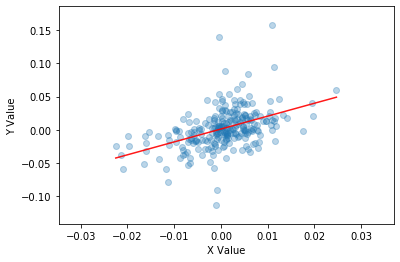

In [4]:
from pandas_datareader import data
start = '2014-01-01'
end = '2015-01-01'
asset = data.get_data_yahoo('TSLA',start,end)['Close']
benchmark = data.get_data_yahoo('SPY',start,end)['Close']

# We have to take the percent changes to get to returns
# Get rid of the first (0th) element because it is NAN
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

linreg(r_b.values, r_a.values)

上图中每个点代表一天，x坐标代表SPY回报率，y坐标代表TSLA回报率。正如我们所看到的，最佳拟合线告诉我们，我们从SPY那里看到的每1%的增加回报，我们应该从TSLA中看到额外的1.92%。这由参数$\beta$表示，其估计值为1.9271。当然，对于下降的回报，我们也会看到TSLA损失的两倍，所以我们没有得到任何东西，我们只是更加不稳定.

## 线性回归与相关

* 线性回归给了我们一个特定的线性模型，但仅限于线性相关的情况。
* 相关性一般是线性和非线性的相关性，但并没有给我们一个实际的模型。
* 两者都是协方差的度量。
* 线性回归通过使X多维化，可以得到Y与许多自变量之间的关系。

## 知道参数与估计

重要的是要记住，所有$\alpha$和$\beta$参数估计的线性回归只是估计。除非您知道产生数据的物理过程，否则您永远不可能知道底层的真实参数。您今天估计的参数可能与包括明天的数据在内的相同分析不同，而且潜在的真实参数可能正在移动。因此，在进行实际分析时，注意参数估计的标准误差是非常重要的。更多关于标准误差的资料将在以后的课程中介绍。了解参数估计值的稳定性的一种方法是使用一个滚动的数据窗口来估计参数估计值，并查看估计值中有多少方差。


## 示例案例
现在我们来看看如果我们把两个完全随机的变量回归会发生什么。

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2436
Date:                Sun, 19 Apr 2020   Prob (F-statistic):              0.623
Time:                        16:33:17   Log-Likelihood:                -15.321
No. Observations:                 100   AIC:                             34.64
Df Residuals:                      98   BIC:                             39.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5360      0.052     10.239      0.000       0.432       0.640
x1             0.0458      0.093      0.494      0.623      -0.138       0.230
==============================================================================
Omnibus:                       23.741   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.058
Skew:                          -0.432   Prob(JB):                       0.0178
Kurtosis:                       1.911   Cond. No.                         4.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

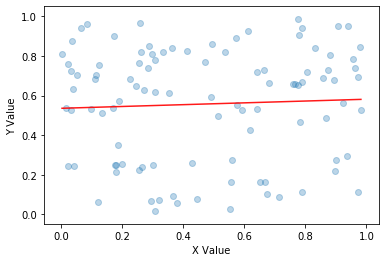

In [5]:
X = np.random.rand(100)
Y = np.random.rand(100)
linreg(X, Y)

上面显示了一个相当均匀的点云。值得注意的是，即使有100个样本，这条线也有一个明显的斜率，这是随机的。这就是为什么使用统计测试而不是可视化来验证结果是至关重要的。

现在让Y依赖于X加上一些随机噪声。

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     250.1
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           1.01e-28
Time:                        16:33:53   Log-Likelihood:                 19.849
No. Observations:                 100   AIC:                            -35.70
Df Residuals:                      98   BIC:                            -30.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0651      0.037     -1.769      0.080      -0.138       0.008
x1             1.0333      0.065     15.814      0.000       0.904       1.163
==============================================================================
Omnibus:                        0.688   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.709   Jarque-Bera (JB):                0.414
Skew:                          -0.151   Prob(JB):                        0.813
Kurtosis:                       3.089   Cond. No.                         4.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

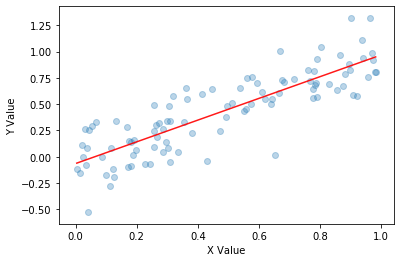

In [6]:
# Generate ys correlated with xs by adding normally-destributed errors
Y = X + 0.2*np.random.randn(100)

linreg(X,Y)

在上述情况下，最佳拟合线确实很好地模拟了因变量Y(具有较高的$R^2$值)。

# 评估和报告结果

回归模型基于以下几个假设:
* 自变量不是随机的。
* 误差项的方差在各观测值之间是恒定的。这对于评价拟合优度很重要。
* 误差不是自相关的。杜宾-沃森统计发现了这一点;如果它接近于2，就不存在自相关。
* 误差是正态分布的。如果这不能成立，我们就不能使用一些统计数据，比如f检验。

如果我们确认回归模型的必要假设是满足的，我们就可以安全地使用报告的统计数据来分析拟合。例如，$R^2$值告诉我们由模型解释的$Y$总变化的百分比。

在基于模型进行预测时，不仅报告单个值，而且报告置信区间是很有用的。线性回归报告了回归参数的95%置信区间，我们可以使用`seaborn`库来可视化这意味着什么，它绘制了回归线并突出了回归线的95%(默认情况下)置信区间:

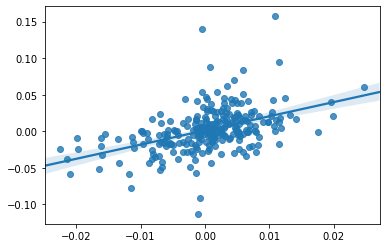

In [7]:
import seaborn

start = '2014-01-01'
end = '2015-01-01'
asset = data.get_data_yahoo('TSLA',start,end)['Close']
benchmark = data.get_data_yahoo('SPY',start,end)['Close']

# We have to take the percent changes to get to returns
# Get rid of the first (0th) element because it is NAN
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

seaborn.regplot(r_b.values, r_a.values);

## 数学背景

这是线性回归的一个非常简短的概述。有关详情，请参阅:
https://en.wikipedia.org/wiki/Linear_regression

## 普通最小二乘法

回归是通过优化最佳拟合线(或高维平面)的位置来实现的。它通过使用一个目标函数来定义契合度有多差来做到这一点。在普通最小二乘回归(OLS)中，我们这里使用的目标函数是:

$$\sum_{i=1}^n (Y_i - a - bX_i)^2$$

我们使用$a$和$b$来表示$\alpha$和$\beta$的潜在候选项。这个目标函数的意思是，对于最佳拟合直线上的每个点，我们将其与实点进行比较，然后取其差的平方。当我们得到更好的参数估计时，这个函数会减小。回归是一个简单的数值优化案例，它有一个封闭的形式的解决方案，不需要任何优化器。我们只要找到最小化目标函数的结果。

我们将最小化目标函数得到的最终模型表示为:

$$ \hat{Y} = \hat{\alpha} + \hat{\beta}X $$

$\hat{\alpha}$和$\hat{\beta}$是我们用于预测的参数的选定估计值，$\hat{Y}$是给定估计值的$Y$的预测值.

## 标准误差

我们还可以通过得到回归返回的模型的`scale`参数并取其平方根，得到标准误差的估计，即测量误差项$\epsilon$的标准差。标准估计误差的计算公式为
$$ s = \left( \frac{\sum_{i=1}^n \epsilon_i^2}{n-2} \right)^{1/2} $$

如果$\hat{\alpha}$和$\hat{\beta}$是真正的参数($\hat{\alpha} = \alpha$和$\hat{\beta} = \beta$)，对于所有$X_i$的值，我们可以将$Y$的特定预测值的误差表示为$s^2$。我们可以简单地对差值$(Y - \hat{Y})$进行平方来得到方差，因为$\hat{Y}$在参数估计本身没有包含任何误差。因为$\hat{\alpha}$和$\hat{\beta}$只是在我们构建$Y$模型时的估计值，任何预测值，$\hat{Y}$，都将根据我们插入模型的$X$项的分布，产生它们自己的标准误差。这一预测误差表示如下:

$$ s_f^2 = s^2 \left( 1 + \frac{1}{n} + \frac{(X - \mu_X)^2}{(n-1)\sigma_X^2} \right) $$

其中$\mu_X$是观测值$X$的平均值，$\sigma_X$是$X$的标准差。调整后的$s^2$包含了我们参数估计中的不确定性。然后预测的95%置信区间是$\hat{Y} \pm t_cs_f$，其中$t_c$是$n$样本的t统计量的临界值和期望的95%置信值。